In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  254 non-null    object 
 2   Lat             254 non-null    float64
 3   Long            254 non-null    float64
 4   1/22/20         254 non-null    int64  
 5   1/23/20         254 non-null    int64  
 6   1/24/20         254 non-null    int64  
 7   1/25/20         254 non-null    int64  
 8   1/26/20         254 non-null    int64  
 9   1/27/20         254 non-null    int64  
 10  1/28/20         254 non-null    int64  
 11  1/29/20         254 non-null    int64  
 12  1/30/20         254 non-null    int64  
 13  1/31/20         254 non-null    int64  
 14  2/1/20          254 non-null    int64  
 15  2/2/20          254 non-null    int64  
 16  2/3/20          254 non-null    int64  
 17  2/4/20          254 non-null    int

In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  254 non-null    object 
 2   Lat             254 non-null    float64
 3   Long            254 non-null    float64
 4   1/22/20         254 non-null    int64  
 5   1/23/20         254 non-null    int64  
 6   1/24/20         254 non-null    int64  
 7   1/25/20         254 non-null    int64  
 8   1/26/20         254 non-null    int64  
 9   1/27/20         254 non-null    int64  
 10  1/28/20         254 non-null    int64  
 11  1/29/20         254 non-null    int64  
 12  1/30/20         254 non-null    int64  
 13  1/31/20         254 non-null    int64  
 14  2/1/20          254 non-null    int64  
 15  2/2/20          254 non-null    int64  
 16  2/3/20          254 non-null    int64  
 17  2/4/20          254 non-null    int

In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


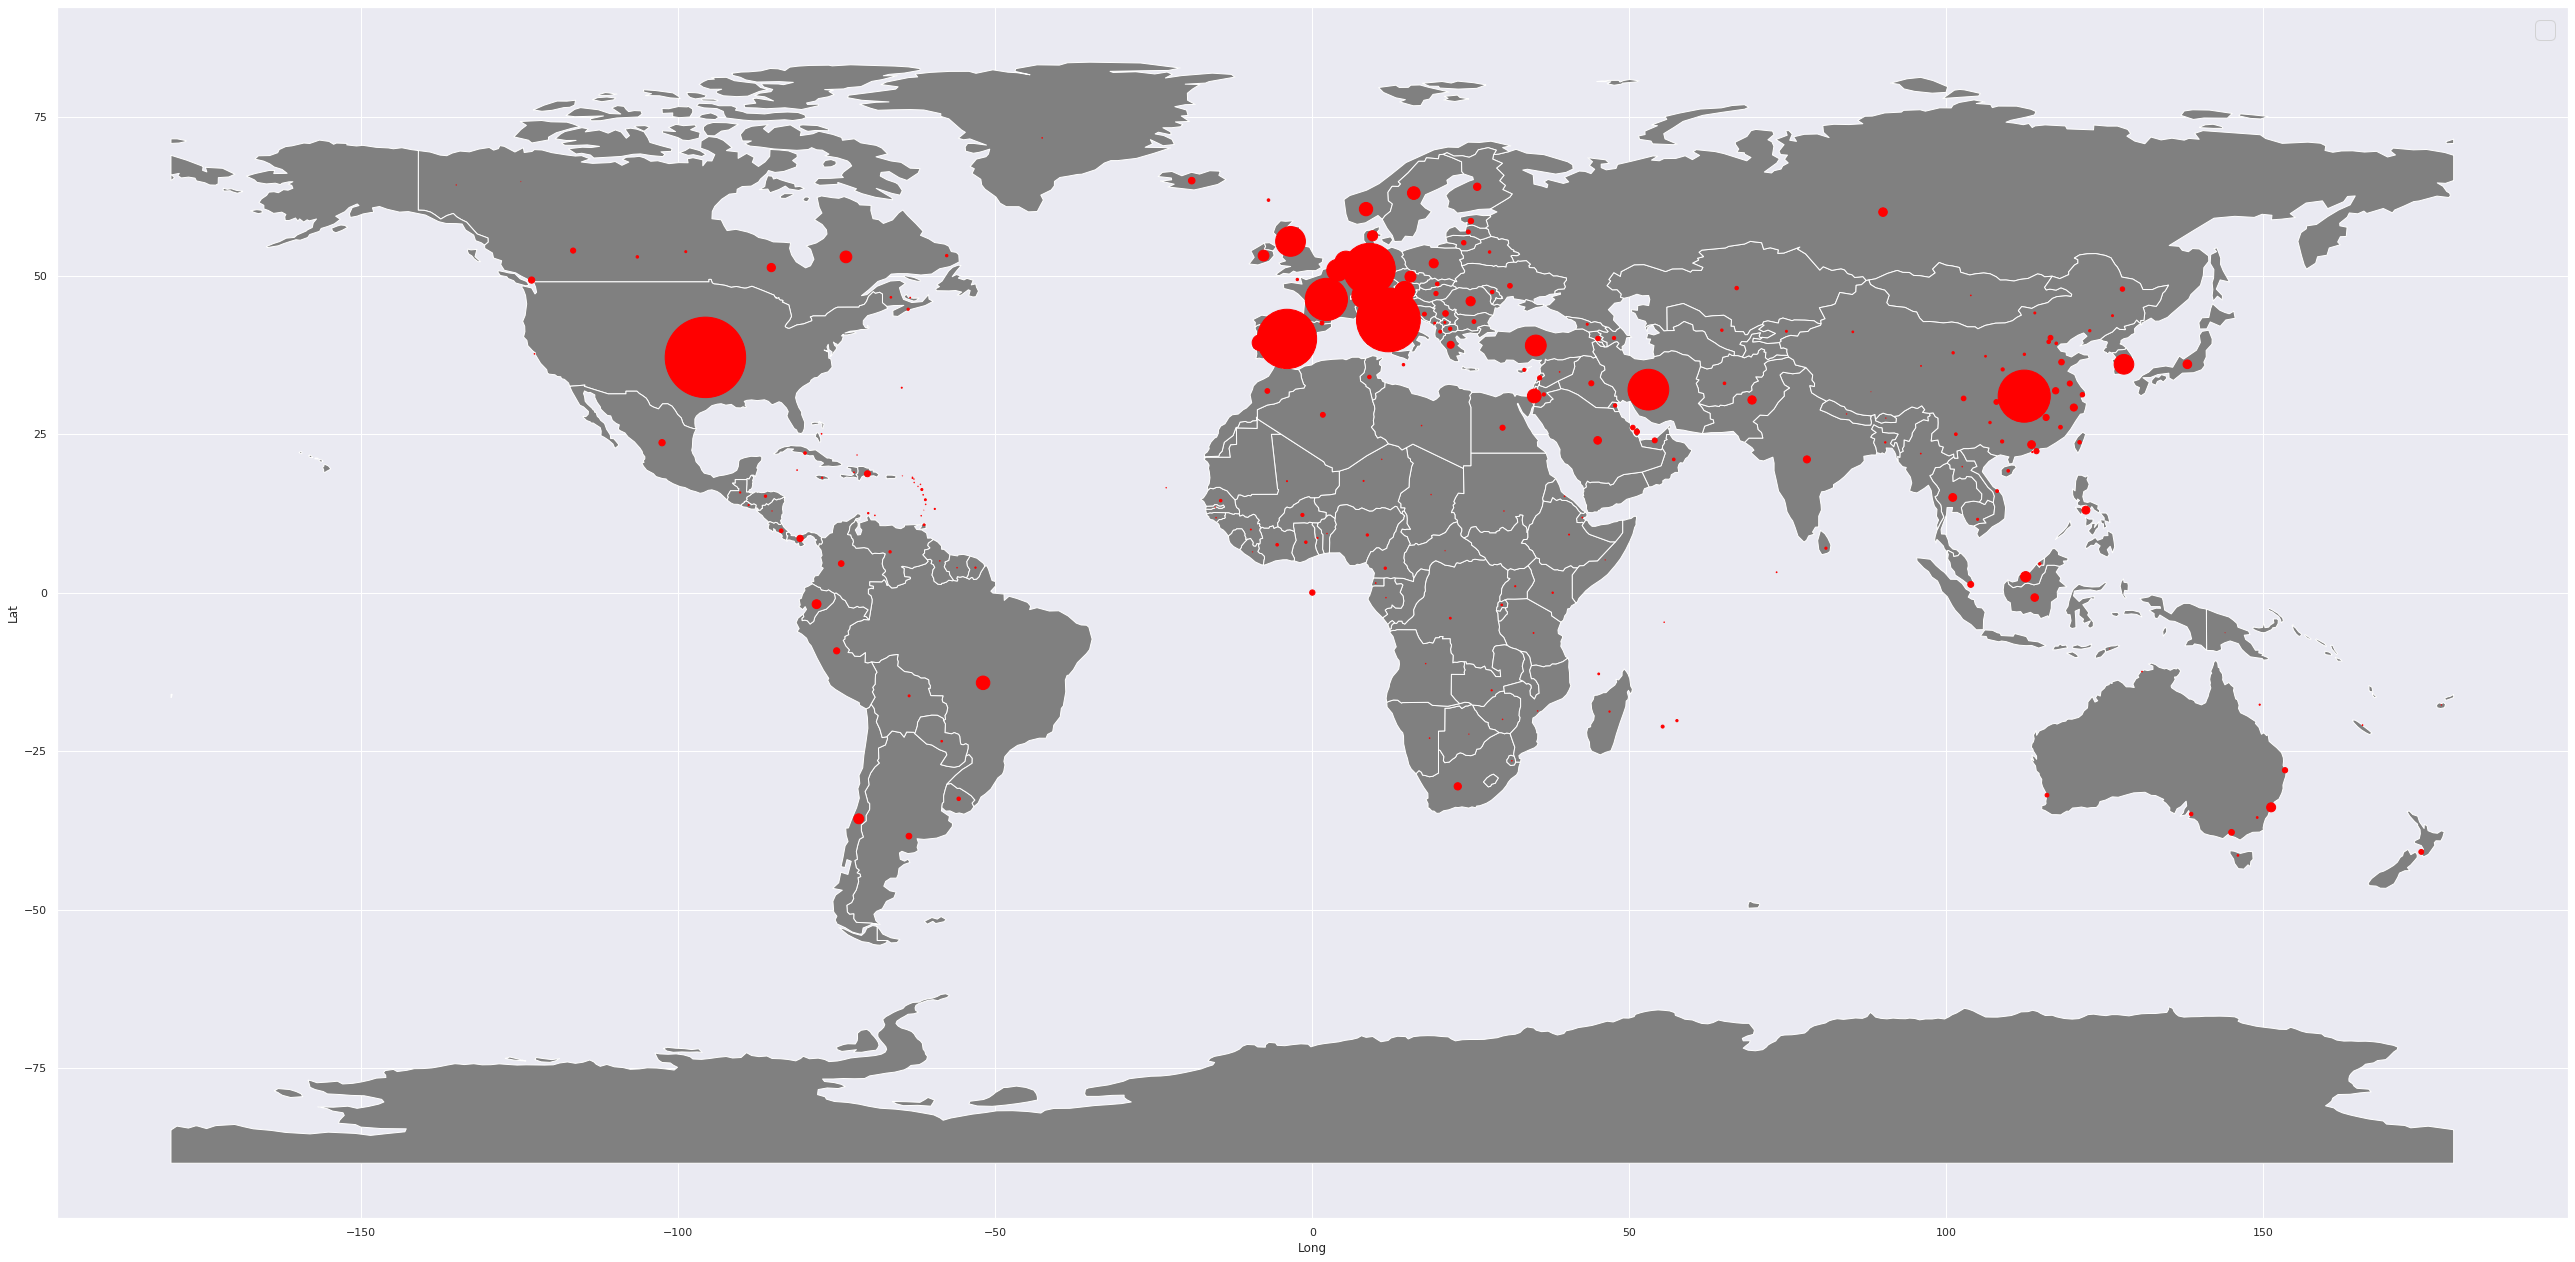

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3/26/20,2,681,10361,7015,5673,74181,6,4144,4955,0
3/27/20,3,869,10950,9357,6658,74720,6,4528,5707,0
3/28/20,3,1072,12384,12285,8481,75100,6,4811,5724,0
3/29/20,3,2665,13030,14709,9211,75582,6,5033,7226,0


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3/26/20,231,558,25,2,13,52,488,26,65,67
3/27/20,263,674,28,2,13,68,581,26,66,80
3/28/20,295,786,34,4,19,95,719,30,74,119
3/29/20,314,901,34,4,24,110,859,32,78,139


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3/26/20,2,8,1,0,0,1,10,1,1,2
3/27/20,2,9,1,1,0,1,20,1,2,2
3/28/20,2,14,1,1,0,1,28,1,3,3
3/29/20,2,17,1,1,0,3,39,1,3,3


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
3/5/20,0,0,0,0,0,0,1,0,0,0
3/6/20,1,0,0,0,0,0,2,0,0,0
3/7/20,1,0,0,0,0,0,2,0,0,0
3/8/20,5,0,0,0,0,0,5,0,0,0
3/9/20,9,0,0,0,0,0,5,0,0,0


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
3/5/20,0,0,0,0,0,0,0,0,0,0
3/6/20,0,0,0,0,0,0,0,0,0,0
3/7/20,0,0,0,0,0,0,0,0,0,0
3/8/20,0,0,0,0,0,0,0,0,0,0
3/9/20,0,0,0,0,0,0,0,0,0,0


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/5/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/6/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
3/7/20,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/8/20,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000
3/9/20,1.800000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,4,4,5,5,9,10,10,11,14,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,14,17,18,18,18,24,26,33,33,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,28,41,51,68,73,90,110,122,127,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,231,277,378,470,491,539,608,702,798,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,134,158,177,201,231,263,295,314,330,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,35,40,48,57,67,80,119,139,170,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,202,245,312,392,488,581,719,859,901,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,3,3,5,9,13,13,19,24,30,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,18,20,23,28,28,28,28,28,43,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,4,4,5,5,9,10,10,11,14,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,14,17,18,18,18,24,26,33,33,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,134,158,177,201,231,263,295,314,330,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,35,40,48,57,67,80,119,139,170,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,202,245,312,392,488,581,719,859,901,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,3,3,5,9,13,13,19,24,30,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,18,20,23,28,28,28,28,28,43,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,5,8,8,11,11,11,11,11,15,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,19,20,21,24,25,28,34,34,36,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'3/29/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,3/29/20,3/30/20
0,NaN,Panama,901,989
1,NaN,Dominican Republic,859,901
2,NaN,Costa Rica,314,330
3,NaN,Cuba,139,170
4,NaN,Honduras,110,139
5,NaN,Trinidad and Tobago,78,82
6,Aruba,Netherlands,50,50
7,French Guiana,France,28,43
8,NaN,Guatemala,34,36
9,NaN,Jamaica,32,36


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,0,2,3,3,4,6,6,6,10,12
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1,1,1,1,1,2,2,3,3,4
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,2,3,3,6,10,10,20,28,39,42
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251], axis=0, inplace=True)

In [50]:
temp_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1,1,1,1,1,2,2,3,3,4


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'3/29/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,3/29/20,3/30/20
0,NaN,Dominican Republic,39,42
1,NaN,Panama,17,24
2,NaN,Honduras,3,7
3,NaN,Cuba,3,4
4,NaN,Trinidad and Tobago,3,3
5,NaN,Costa Rica,2,2
6,Cayman Islands,United Kingdom,1,1
7,Curacao,Netherlands,1,1
8,St Martin,France,0,1
9,NaN,Guatemala,1,1


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,1,3,3,6,8,8,10,10,10,15
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,4
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,0,0,0,1,1,1,4,4,4,4
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3,3,4
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,4
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,0,0,0,1,1,1,4,4,4,4
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3,3,4
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,0,6,6,6,6,6,6,6,6,6
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,0,0,0,0,4,4,4,10,10,10


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'3/29/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,3/29/20,3/30/20
0,NaN,Guatemala,10,10
1,French Guiana,France,6,6
2,NaN,Costa Rica,3,4
3,NaN,Cuba,4,4
4,NaN,Dominican Republic,3,4
5,NaN,Panama,4,4
6,NaN,Honduras,3,3
7,St Martin,France,0,2
8,NaN,Jamaica,2,2
9,Curacao,Netherlands,2,2


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1,1,3,3,3,7,7,7,7,7
1,Bahamas,0,0,0,0,0,0,0,0,0,...,4,4,4,5,5,9,10,10,11,14
2,Barbados,0,0,0,0,0,0,0,0,0,...,6,14,17,18,18,18,24,26,33,33
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,117,134,158,177,201,231,263,295,314,330
4,Cuba,0,0,0,0,0,0,0,0,0,...,21,35,40,48,57,67,80,119,139,170
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,112,202,245,312,392,488,581,719,859,901
6,El Salvador,0,0,0,0,0,0,0,0,0,...,3,3,3,5,9,13,13,19,24,30
7,French Guiana,0,0,0,0,0,0,0,0,0,...,18,18,20,23,28,28,28,28,28,43
8,St Martin,0,0,0,0,0,0,0,0,0,...,4,5,8,8,11,11,11,11,11,15
9,Guatemala,0,0,0,0,0,0,0,0,0,...,17,19,20,21,24,25,28,34,34,36


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bahamas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barbados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,Cuba,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,3,3,4
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,2,3,3,6,10,10,20,28,39,42
6,El Salvador,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,French Guiana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,St Martin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bahamas,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2,Barbados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,4
4,Cuba,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,4,4,4,4
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3,3,4
6,El Salvador,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,French Guiana,0,0,0,0,0,0,0,0,0,...,0,6,6,6,6,6,6,6,6,6
8,St Martin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,Guatemala,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,4,4,10,10,10


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
active_camcar_all

Country/Region,Antigua and Barbuda,Bahamas,Barbados,Costa Rica,Cuba,Dominican Republic,El Salvador,French Guiana,St Martin,Guatemala,...,Honduras,Jamaica,Aruba,Curacao,Sint Maarten,Nicaragua,Panama,Saint Lucia,Trinidad and Tobago,Cayman Islands
2/29/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/5/20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/6/20,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/7/20,0,0,0,1,0,2,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3/8/20,0,0,0,5,0,5,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3/9/20,0,0,0,9,0,5,0,5,2,0,...,0,0,0,0,0,0,0,0,0,0
